In [2]:
import json

import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

from datasets import get_CIFAR10, get_SVHN, postprocess
# from glow import Glow
from model import Glow

device = torch.device("cpu")

# output_folder = '/Users/charumathibadrinath/Downloads/glow/'
model_name = 'glow_affine_coupling.pt'

with open('hparams.json') as json_file:  
    hparams = json.load(json_file)
    
image_shape, num_classes, _, test_cifar = get_CIFAR10(hparams['augment'], hparams['dataroot'], hparams['download'])
image_shape, num_classes, _, test_svhn = get_SVHN(hparams['augment'], hparams['dataroot'], hparams['download'])


model = Glow(image_shape, hparams['hidden_channels'], hparams['K'], hparams['L'], hparams['actnorm_scale'],
             hparams['flow_permutation'], hparams['flow_coupling'], hparams['LU_decomposed'], num_classes,
             hparams['learn_top'], hparams['y_condition'])

print(image_shape)
print(hparams)
model.load_state_dict(torch.load(output_folder + model_name, map_location=torch.device('cpu')))
model.set_actnorm_init()

model = model.to(device)

model = model.eval()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/charumathibadrinath/Downloads/glow/hparams.json'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


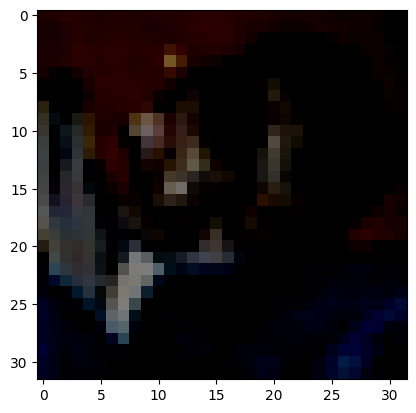

In [57]:
# load an image from cifar
image, _ = test_cifar[0]

In [46]:
# encode the image with the normalizing flow
z, nll, y_logits = model(image.unsqueeze(0).to(device))

In [41]:
z = torch.normal(0, 1, (1, 48, 4, 4)).to(device)
z2 = (torch.normal(0, 1, (1, 48, 4, 4)) + 1).to(device)

In [71]:
def sample(model):
    with torch.no_grad():
        y = None
        # temperature 0 yields deterministic results
        images = postprocess(model(y_onehot=y, z=z, temperature=0, reverse=True))

    return images.cpu()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 31.5, 31.5, -0.5)

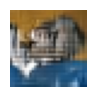

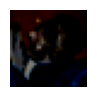

In [74]:
images = sample(model)
grid = make_grid(images, nrow=6).permute(1,2,0)

plt.figure(figsize=(1,1))
plt.imshow(grid)
plt.axis('off')

# show the original
plt.figure(figsize=(1,1))
plt.imshow(image.permute(1,2,0))
plt.axis('off')